In [5]:
from scripts import support, insd, kuroda, nras, metrics, vectorization as v
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Load base matrix
df = pd.read_excel("./data/all2011.xlsx", 'ТИоц',skiprows=1,index_col=2)
df = df.iloc[2:-11,2:-16].astype(np.float)
# Load predicted matrix
pred_df = pd.read_excel("./data/tri-2012.xlsx", 'ТИоц',skiprows=1,index_col=2)
pred_df = pred_df.iloc[2:-12,2:-11].astype(np.float)
shape = pred_df.shape


In [7]:
# Sums of rows\columns
sums_rows = pred_df.sum(axis=1).values.reshape(-1,1)
sums_cols = pred_df.sum(axis=0).values.reshape(-1,1)

# Vectorization of matrix
vect_a = v.tovector(df.values)
vect_a

array([[7.02865e+05],
       [8.83000e+02],
       [6.40000e+01],
       ...,
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00]])

In [11]:
# Merge column of constraints
c = np.append(sums_rows,sums_cols,axis=0)

# Create matrix G of coefficients of constraints 
G = v.addrows(shape,sparsed=True) # Use "sparsed" parameter everywhere if want use fast sparsed matrix
G = v.addcolumns(shape,G,sparsed=True) # Use "sparsed" parameter everywhere if want use fast sparsed matrix
G.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

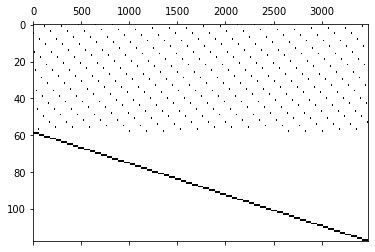

In [12]:
# Look on the distribution of 0s and 1s in matrix of coefficients G
plt.spy(G.toarray(),aspect='auto')

In [23]:
# Run method of projection - INSD(~201 ms) and got metrics and result matrix 
res_df = insd.insd(aa=vect_a,c=c, G=G,sparsed=True) # Use "sparsed" parameter everywhere if want use fast sparsed matrix
print("\nMetrics:")
metrics.get_values(res_df,pred_df.values)
print("\nResult matrix:")
pd.DataFrame(v.tomatrix(res_df)).round(3).head()

Parameter BarConvTol unchanged
   Value: 1e-08  Min: 0.0  Max: 1.0  Default: 1e-08
Parameter BarQCPConvTol unchanged
   Value: 1e-06  Min: 0.0  Max: 1.0  Default: 1e-06
Changed value of parameter DualReductions to 0
   Prev: 1  Min: 0  Max: 1  Default: 1

Metrics:
N0 390
PSISTAT 0.0025
RSQ 0.9977
MAPE 12.0875
SWAD 0.0256
WAPE 6.0546

Result matrix:


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,703254.998,710.988,446.138,3.075,189.392,0.000,5.789,116.212,1397528.792,36145.869,...,1273.473,765.666,37011.175,4813.264,21093.756,132.718,679.351,1462.063,3678.361,0.0
1,908.877,17381.577,1.120,143.331,132.954,0.000,21.358,17.004,358.219,0.000,...,17.980,68.644,6297.640,158.427,257.520,14.074,19.805,158.741,135.816,0.0
2,63.981,0.000,5056.309,0.000,0.000,0.000,1.157,0.000,77703.387,0.000,...,84.249,11.853,705.885,12.022,363.301,1.143,34.262,107.114,0.000,0.0
3,1375.485,8.417,47.945,80800.005,410.626,0.707,360.469,146.950,1623.731,0.000,...,38.170,209.673,2761.132,561.983,2384.373,140.818,19.478,185.625,216.505,0.0
4,252.023,0.000,0.000,356.735,320588.748,0.000,0.000,229.470,105.698,0.000,...,7.699,4809.419,0.000,0.000,13.573,2.665,0.000,0.000,0.000,0.0


In [24]:
# Run method of projection - NRAS(~181 ms) and got metrics and result matrix 
res_df = nras.nras(G=G,aa=vect_a,c=c,accuracy=0.01, limit = 100,sparsed=True)
print("\nMetrics:")
metrics.get_values(res_df,pred_df.values)

23

Metrics:
N0 390
PSISTAT 0.0025
RSQ 0.9978
MAPE 11.9702
SWAD 0.0249
WAPE 6.0148


In [28]:
# Run method of projection - Kuroda(~331 ms) and got metrics and result matrix
res_df = kuroda.kuroda(G=G,aa=vect_a,c=c,mtype=2,sparsed=True)
print("\nMetrics:")
metrics.get_values(res_df,pred_df.values)

Parameter BarConvTol unchanged
   Value: 1e-08  Min: 0.0  Max: 1.0  Default: 1e-08
Parameter BarQCPConvTol unchanged
   Value: 1e-06  Min: 0.0  Max: 1.0  Default: 1e-06
Parameter DualReductions unchanged
   Value: 1  Min: 0  Max: 1  Default: 1

Metrics:
N0 390
PSISTAT 0.0096
RSQ 0.9967
MAPE 533.0687
SWAD 0.0338
WAPE 8.2333
